## <b><span style='color:#F1C40F'>|</span> Згенеруємо випадковий набір даних в діапазоні 1000 значень </b>

In [1]:
import numpy as np

np.random.seed(42)
X = np.random.rand(1000, 1) * 1000      # Випадкові дані для X
y = np.random.rand(1000) * 1000         # Випадкові дані для y

print("X: \n", X[:10])
print("y: \n", y[:10])

X: 
 [[374.54011885]
 [950.71430641]
 [731.99394181]
 [598.6584842 ]
 [156.01864044]
 [155.99452034]
 [ 58.08361217]
 [866.17614577]
 [601.11501174]
 [708.0725778 ]]
y: 
 [185.13292884 541.90094738 872.94583588 732.22488641 806.56114786
 658.78336671 692.27656452 849.19565157 249.66800886 489.42496364]


## <b><span style='color:#F1C40F'>|</span> Нормалізовуємо дані</b>

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("X нормалізований:\n", X_scaled[:10])

X нормалізований:
 [[0.37173493]
 [0.95075462]
 [0.73095408]
 [0.59696013]
 [0.15213426]
 [0.15211002]
 [0.05371557]
 [0.86579896]
 [0.59942879]
 [0.70691458]]


## <b><span style='color:#F1C40F'>|</span> Розділимо існуючі записи на навчальну і тестову вибірку</b>

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## <b><span style='color:#F1C40F'>|</span> Навчимо KNN-регресор з різними значеннями K</b>

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

k_values = range(1, 103, 3)  # Значення К в проміжку від 1 до 103 з кроком 3
errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)  # Ініціалізація KNN
    mse_scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # Крос-валідація
    error = np.mean(mse_scores)  # Обчислення середньої помилки
    errors.append(error)
    print(f"K={k}, MSE (CV)={error:.3f}")

K=1, MSE (CV)=172438.970
K=4, MSE (CV)=101293.776
K=7, MSE (CV)=96957.820
K=10, MSE (CV)=92722.206
K=13, MSE (CV)=91599.172
K=16, MSE (CV)=89384.567
K=19, MSE (CV)=87722.172
K=22, MSE (CV)=86818.019
K=25, MSE (CV)=87070.435
K=28, MSE (CV)=86937.874
K=31, MSE (CV)=86661.926
K=34, MSE (CV)=86125.859
K=37, MSE (CV)=85887.869
K=40, MSE (CV)=85588.097
K=43, MSE (CV)=85188.365
K=46, MSE (CV)=84813.173
K=49, MSE (CV)=84823.779
K=52, MSE (CV)=84970.887
K=55, MSE (CV)=84642.761
K=58, MSE (CV)=84982.524
K=61, MSE (CV)=85100.616
K=64, MSE (CV)=85150.460
K=67, MSE (CV)=85067.528
K=70, MSE (CV)=85177.116
K=73, MSE (CV)=85308.326
K=76, MSE (CV)=85719.238
K=79, MSE (CV)=85678.925
K=82, MSE (CV)=85773.611
K=85, MSE (CV)=85426.102
K=88, MSE (CV)=85456.550
K=91, MSE (CV)=85370.783
K=94, MSE (CV)=85471.281
K=97, MSE (CV)=85600.205
K=100, MSE (CV)=85653.270


## <b><span style='color:#F1C40F'>|</span> Виберемо величину K для найкращих показників якості регресії у тестовій вибірці</b>

In [5]:
best_k_index = np.argmin(errors)    # Індекс найменшої помилки
best_k = k_values[best_k_index]     # Найкраще значення K
print(f"Найкраще значення K: {best_k} з середньою помилкою MSE: {errors[best_k_index]:.3f}")

Найкраще значення K: 55 з середньою помилкою MSE: 84642.761


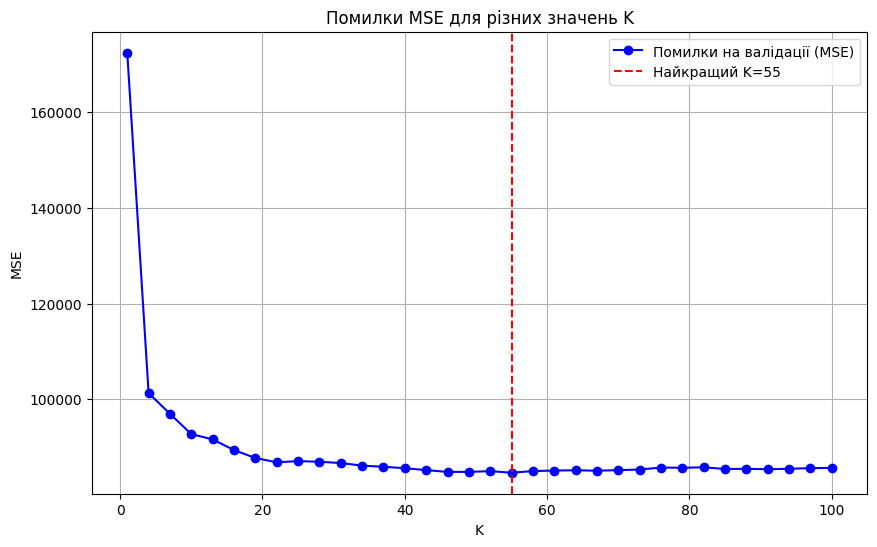

In [6]:
# Візуалізація помилок для різних K
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', color='b', label='Помилки на валідації (MSE)')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Найкращий K={best_k}')
plt.title('Помилки MSE для різних значень K')
plt.xlabel('K')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

## <b><span style='color:#F1C40F'>|</span> Натренуємо KNN модель на найкращому значенні k</b>

In [7]:
from sklearn.metrics import mean_squared_error

# Тренування моделі з найкращим K
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Оцінка моделі на тестовій вибірці
test_error = mean_squared_error(y_test, y_pred)  # Обчислення MSE на тестовій вибірці
print(f"MSE на тестовій вибірці з K={best_k}: {test_error:.3f}")

MSE на тестовій вибірці з K=55: 90753.391


## <b><span style='color:#F1C40F'>|</span> Візуалізуємо отриманні рішення</b>

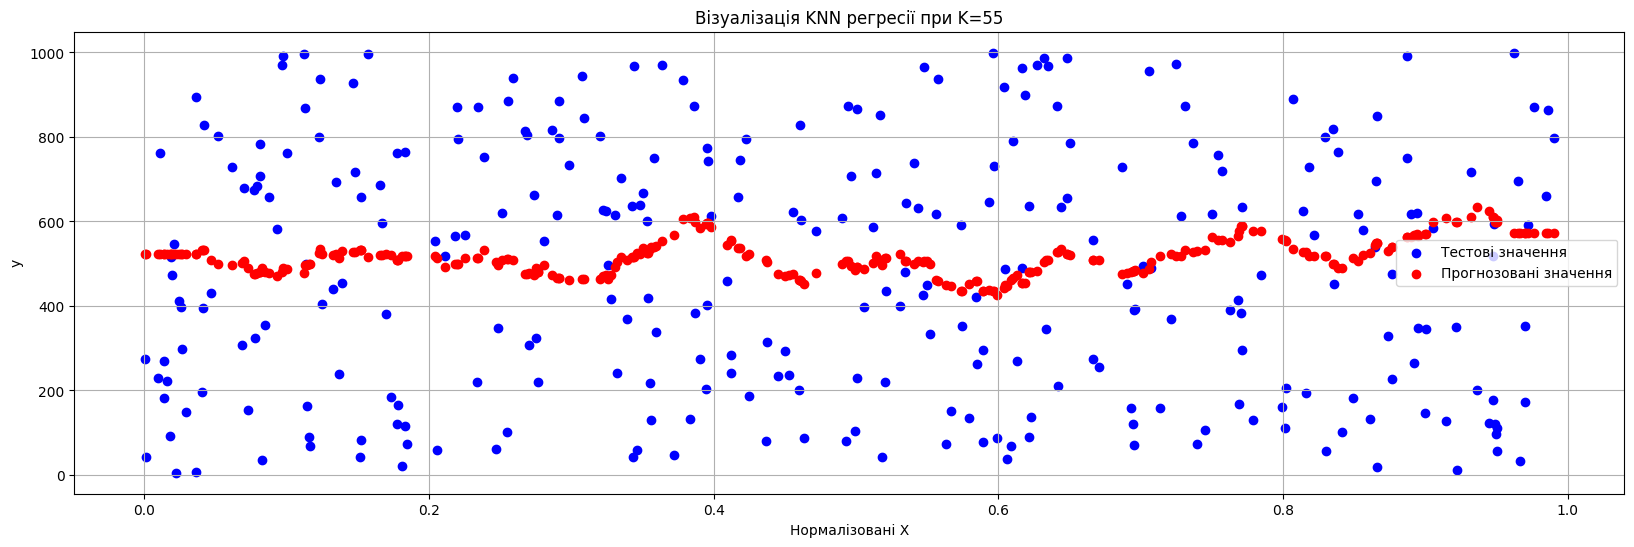

In [8]:
# Візуалізація результатів моделі
plt.figure(figsize=(20, 6))
plt.scatter(X_test, y_test, color='blue', label='Тестові значення')  # Тестові значення
plt.scatter(X_test, y_pred, color='red', label='Прогнозовані значення')  # Прогнозовані значення
plt.title(f'Візуалізація KNN регресії при K={best_k}')
plt.xlabel('Нормалізовані X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()